/Users/warbean/.virtualenvs/py2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/warbean/.virtualenvs/py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


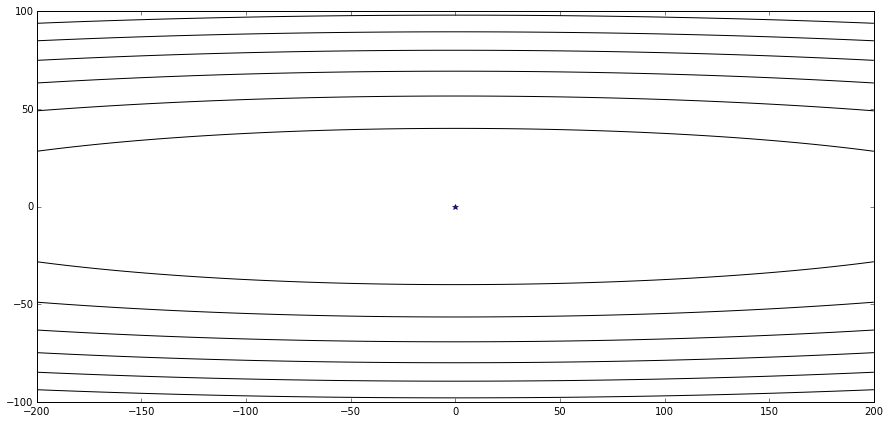

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x[0] * x[0] + 50 * x[1] * x[1]
def g(x):
    return np.array([2 * x[0], 100 * x[1]])
xi = np.linspace(-200,200,1000)
yi = np.linspace(-100,100,1000)
X,Y = np.meshgrid(xi, yi)
Z = X * X + 50 * Y * Y

%matplotlib inline
def contour(X,Y,Z, arr = None):
    plt.figure(figsize=(15,7))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contour(X, Y, Z, colors='black')
    plt.plot(0,0,marker='*')
    if arr is not None:
        arr = np.array(arr)
        for i in range(len(arr) - 1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])
        
contour(X,Y,Z)

  +150.00000000 == +150.00000000  : True, 	    +75.00000000 == +75.00000000   : True
  +146.40000000 == +146.40000000  : True, 	    -15.00000000 == -15.00000000   : True
  +139.72416000 == +139.72416000  : True, 	    +19.20000000 == +19.20000000   : True
  +130.50672230 == +130.50672230  : True, 	     -9.99600000 == -9.99600000    : True
  +119.27796370 == +119.27796370  : True, 	     +7.25448000 == +7.25448000    : True
  +106.55195101 == +106.55195101  : True, 	     -4.55598240 == -4.55598240    : True
   +92.81617464 == +92.81617464   : True, 	     +3.03707971 == +3.03707971    : True
   +78.52308048 == +78.52308048   : True, 	     -1.97416712 == -1.97416712    : True
   +64.08347264 == +64.08347264   : True, 	     +1.29685785 == +1.29685785    : True
   +49.86171778 == +49.86171778   : True, 	     -0.84815607 == -0.84815607    : True
   +36.17264707 == +36.17264707   : True, 	     +0.55573372 == +0.55573372    : True
   +23.28002384 == +23.28002384   : True, 	     -0.36384691 == -0

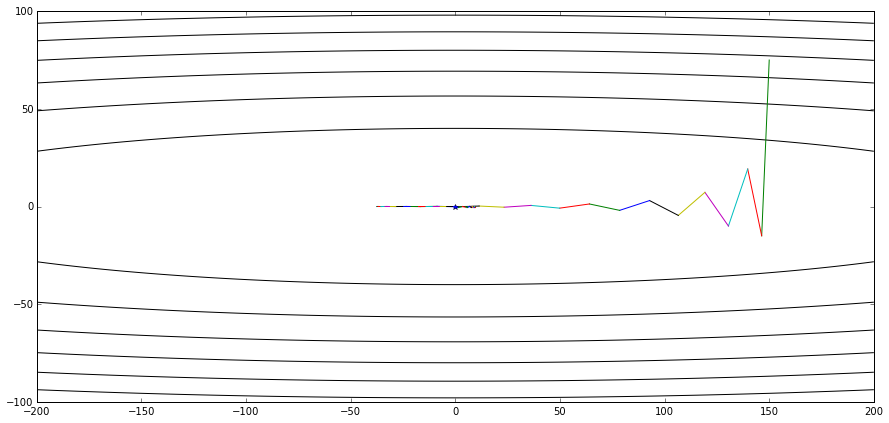

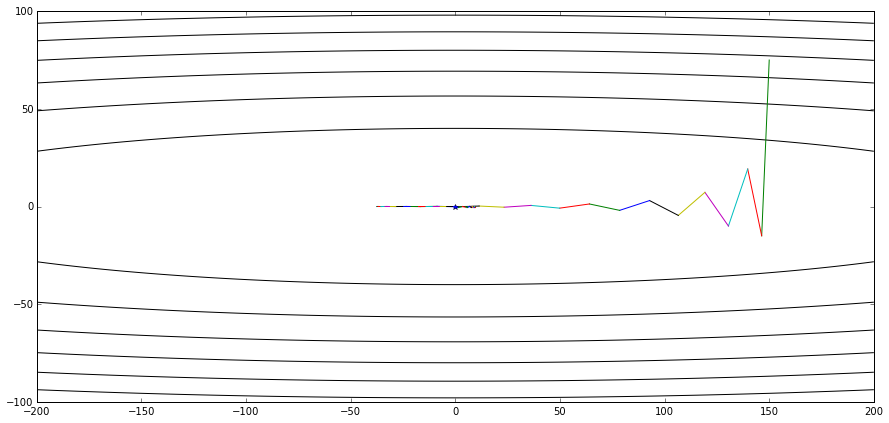

In [2]:
def nesterov(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(50):
        x_future = x - step * discount * pre_grad
        grad = g(x_future)
        pre_grad = pre_grad * discount + grad 
        x -= pre_grad * step
        passing_dot.append(x.copy())
        #print '[ Epoch {0} ] grad = {1}, x = {2}'.format(i, grad, x)
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot
def equivalent(x_start, step, g, discount):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_direction = np.zeros_like(x)
    pre_grad = g(x)
    for i in range(50):
        grad = g(x)
        direction = pre_direction * discount + grad + (grad - pre_grad) * discount
        x -= direction * step
        pre_direction = direction
        pre_grad = grad
        passing_dot.append(x.copy())
        #print '[ Epoch {0} ] grad = {1}, x = {2}'.format(i, grad, x)
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot
start_point = [150,75]
step = 0.012
discount = 0.9
# 看图：两次优化的轨迹完全一样
res1, x_arr1 = equivalent(start_point, step, g, discount)
contour(X,Y,Z, x_arr1)
res2, x_arr2 = nesterov(start_point, step, g, discount)
contour(X,Y,Z, x_arr2)
# 看数值：两次优化的轨迹完全一样
for x1, x2 in zip(x_arr1, x_arr2):
    print '%+15.08f == %+-15.08f: %s, \t %+15.08f == %+-15.08f: %s' % \
    (x1[0], x2[0], abs(x1[0] - x2[0]) < 1e-13, x1[1], x2[1], abs(x1[1] - x2[1]) < 1e-13)

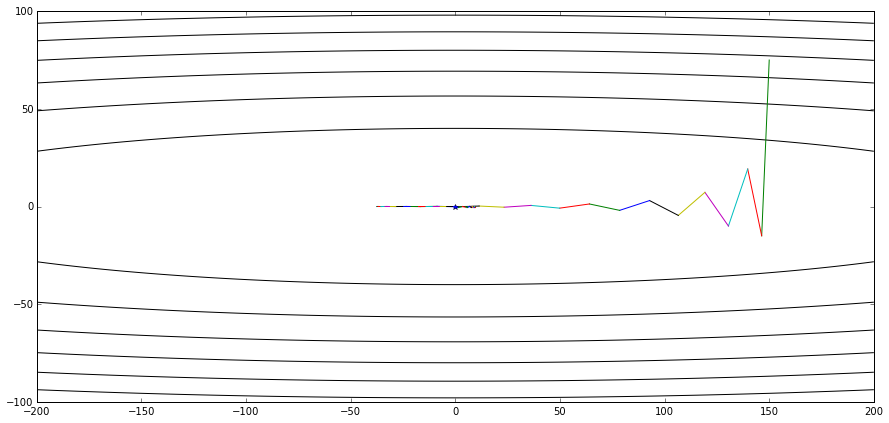

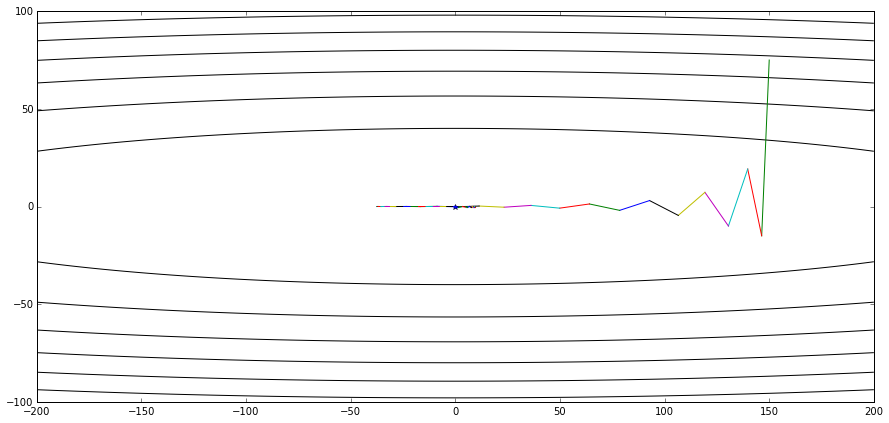

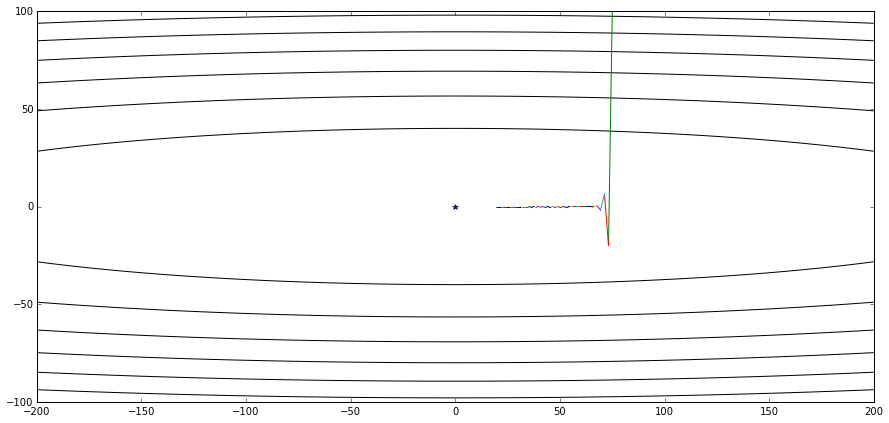

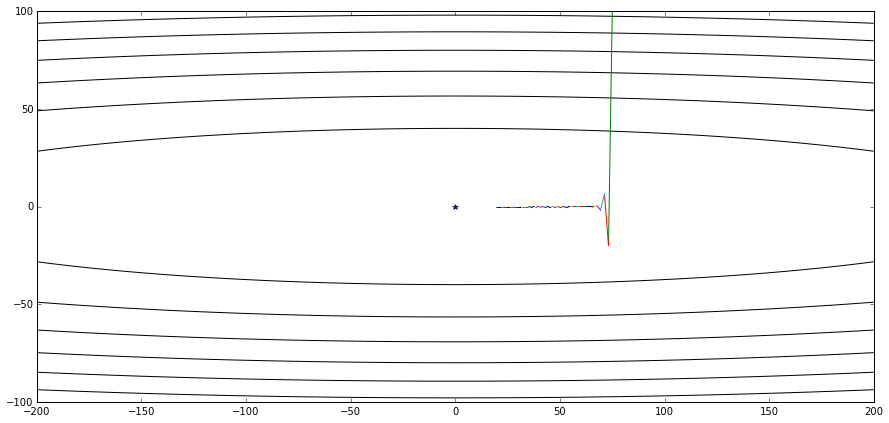

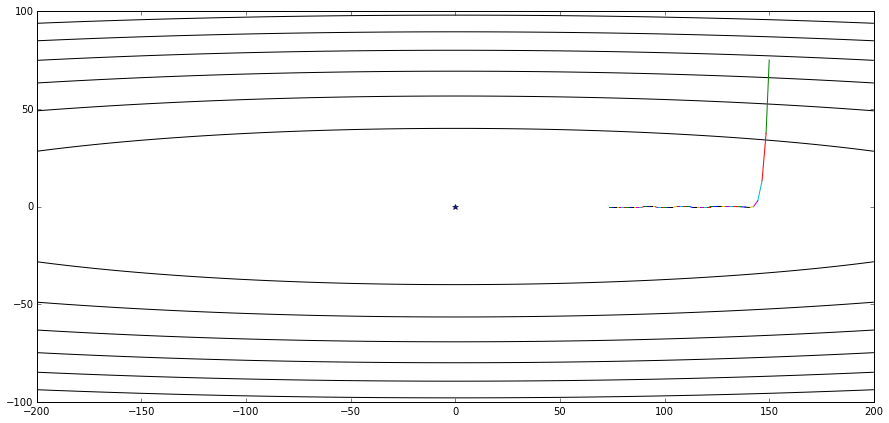

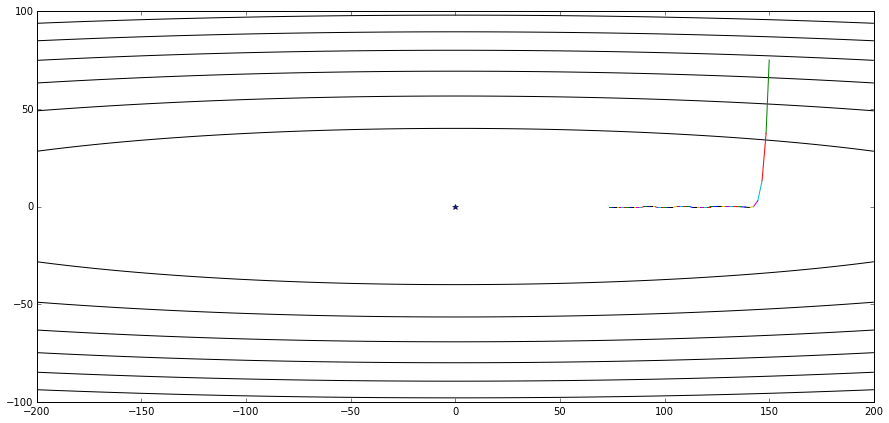

In [3]:
# 更多组合测试
def compare(start_point, step, discount):
    res1, x_arr1 = equivalent(start_point, step, g, discount)
    contour(X,Y,Z, x_arr1)
    res2, x_arr2 = nesterov(start_point, step, g, discount)
    contour(X,Y,Z, x_arr2)
compare([150,75], 0.012, 0.9)
compare([75, 100], 0.012, 0.1)
compare([150,75], 0.005, 0.3)